In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statistics import NormalDist

from sklearn.preprocessing import scale
import math
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Define the minimum and maximum values for probability of event
MIN = .07
MAX = .17
# Define the number of trials
NUM_SAMPLES = 1000
# Define the log loss mean and standard deviation
LOG_MEAN = 12.55
LOG_STD = 3.06

In [4]:
# Initialize lists to store trial results
trial_results = []

In [5]:
# Ensure we always get the same numbers
# random.seed(42)

In [6]:
# Generate random numbers for each trial
for trial in range(NUM_SAMPLES):
    # Generate a random number between MIN and MAX
    random_number = MIN + (MAX-MIN) * random.random()
    trial_results.append(random_number)

In [7]:
# Create a DataFrame to store the trial results
data = {'Frequency': np.arange(1, NUM_SAMPLES + 1), 'Probability_of_event': trial_results}
df = pd.DataFrame(data)

In [8]:
# Display the results
df

,Frequency,Probability_of_event
0,1,0.074648
1,2,0.099988
2,3,0.157287
3,4,0.091065
4,5,0.127688
...,...,...
995,996,0.149055
996,997,0.162524
997,998,0.161886
998,999,0.137214


In [9]:
df['Simulated_event'] = df['Probability_of_event'].apply(lambda x : round(random.random()))

In [10]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event
0,1,0.074648,0
1,2,0.099988,1
2,3,0.157287,1
3,4,0.091065,0
4,5,0.127688,0
...,...,...,...
995,996,0.149055,1
996,997,0.162524,1
997,998,0.161886,1
998,999,0.137214,0


In [11]:
df.Simulated_event.describe()

count    1000.000000
mean        0.522000
std         0.499766
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Simulated_event, dtype: float64

In [12]:
res = NormalDist(mu=LOG_MEAN, sigma=LOG_STD).inv_cdf(random.uniform(0, 1))

In [14]:
dist = []
for i in range(NUM_SAMPLES):
    res = NormalDist(mu=LOG_MEAN, sigma=LOG_STD).inv_cdf(random.uniform(0, 1))
    dist.append(res)

In [15]:
df['Possible_loss'] = pd.Series(dist, index=df.index)

In [16]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss
0,1,0.074648,0,7.961562
1,2,0.099988,1,12.083329
2,3,0.157287,1,12.210890
3,4,0.091065,0,11.883288
4,5,0.127688,0,10.776802
...,...,...,...,...
995,996,0.149055,1,16.074262
996,997,0.162524,1,12.428929
997,998,0.161886,1,12.683042
998,999,0.137214,0,9.306118


In [17]:
df['Simulated_event'].describe()

count    1000.000000
mean        0.522000
std         0.499766
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Simulated_event, dtype: float64

In [18]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss
0,1,0.074648,0,7.961562
1,2,0.099988,1,12.083329
2,3,0.157287,1,12.210890
3,4,0.091065,0,11.883288
4,5,0.127688,0,10.776802
...,...,...,...,...
995,996,0.149055,1,16.074262
996,997,0.162524,1,12.428929
997,998,0.161886,1,12.683042
998,999,0.137214,0,9.306118


In [19]:
df['Simulated_loss'] = df['Simulated_event'] * df['Possible_loss']

In [20]:
def logarithmbase10(x):
    try:
        return math.log10(x)
    except:
        return 0.0001

In [21]:
df['Log_simulated_loss'] = df['Simulated_loss'].apply(lambda x : logarithmbase10(x))

In [22]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss,Simulated_loss,Log_simulated_loss
0,1,0.074648,0,7.961562,0.000000,0.000100
1,2,0.099988,1,12.083329,12.083329,1.082187
2,3,0.157287,1,12.210890,12.210890,1.086747
3,4,0.091065,0,11.883288,0.000000,0.000100
4,5,0.127688,0,10.776802,0.000000,0.000100
...,...,...,...,...,...,...
995,996,0.149055,1,16.074262,16.074262,1.206131
996,997,0.162524,1,12.428929,12.428929,1.094434
997,998,0.161886,1,12.683042,12.683042,1.103223
998,999,0.137214,0,9.306118,0.000000,0.000100


In [23]:
# df['Simulated_loss'] = df['Simulated_loss'].apply(lambda x : 0.0001000 if x==0.000000 else x)

In [24]:
actual_losses = [x for x in df['Log_simulated_loss'] if x > 0.0001]

Text(0.5, 0, 'Simulated Losses [$ MM]')

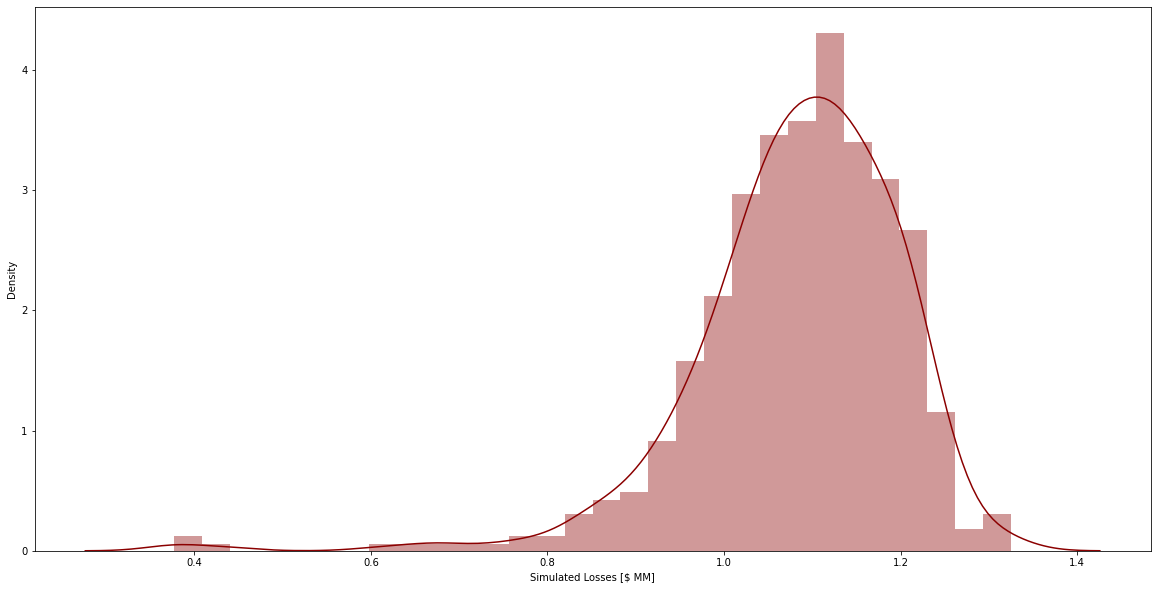

In [25]:
plt.figure(figsize=(20, 10))
sns.distplot(actual_losses, bins=30, color='darkred')
plt.xlabel('Simulated Losses [$ MM]')

In [26]:
# plt.figure(figsize=(20, 10))
# sns.histplot(actual_losses, bins=30, stat='density', color='darkred')
# sns.kdeplot(actual_losses, fill=True, color='darkred')
# plt.xlabel('Simulated Loses [$ MM]')